In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.decomposition import PCA

X = np.load('E:/BAITAP\ML/Nang_cao/X.npy')
Y = np.load('E:/BAITAP\ML/Nang_cao/Y.npy')

X.shape
#2062 mẫu, kích thước 64x64

(2062, 64, 64)

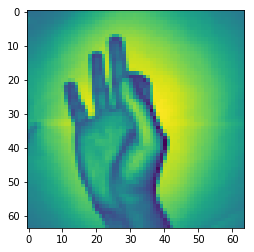

In [2]:
#thử với 1 mẫu
plt.imshow(X[0])

In [3]:
9 - np.argmax(Y[0])
#9 là cách gán nhãn của bộ dữu liệu, chữ số 9 trông giống như chữ số [1, 0, 0, 0, 0, 0, .. ], 8 [0, 1, 0, 0, 0, 0, 0, ..]...

9

In [4]:
#chia tập dữ liệu để huấn luyện
#từ 2062 mẫu chuyển thành 4096 vecto mờ
X_flat = np.array(X).reshape((2062, 64*64))

X_train, X_test, y_train, y_test = train_test_split(X_flat, Y, test_size=0.3, random_state=42)

In [5]:
#tọa 1 mô hình mới
clf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(20, 20, 20), random_state=1)
clf.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(20, 20, 20), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [6]:
y_hat = clf.predict(X_test)

print("accuracy: " + str(accuracy_score(y_test, y_hat)))
#độ chính xác cua mô hình chỉ đạt 33% => cải thiện

accuracy: 0.11793214862681745


In [7]:
pca_dims = PCA()
pca_dims.fit(X_train)
cumsum = np.cumsum(pca_dims.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
#0.95 là phương sai của ảnh gốc

In [8]:
d
#giảm xuống còn 292 chiều

292

In [9]:
#đào tạo mô hình
pca = PCA(n_components=d)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

In [10]:
#in ra ví dụ
print("reduced shape: " + str(X_reduced.shape))
print("recovered shape: " + str(X_recovered.shape))

reduced shape: (1443, 292)
recovered shape: (1443, 4096)


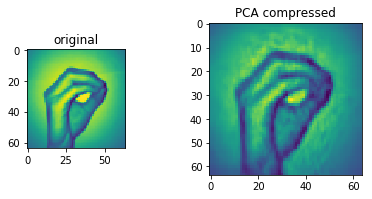

In [11]:
f = plt.figure()
f.add_subplot(1,3, 1)
plt.title("original")
plt.imshow(X_train[0].reshape((64,64)))
f.add_subplot(1,2, 2)

plt.title("PCA compressed")
plt.imshow(X_recovered[0].reshape((64,64)))
plt.show(block=True)

In [12]:
clf_reduced = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(20, 20, 20))
clf_reduced.fit(X_reduced, y_train)

C:\Users\ngoc\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(20, 20, 20), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [13]:
#độ chính xac của mô hình đào tạo đã giảm chiều
X_test_reduced = pca.transform(X_test)

y_hat_reduced = clf_reduced.predict(X_test_reduced)

print("accuracy: " + str(accuracy_score(y_test, y_hat_reduced)))

accuracy: 0.6413570274636511


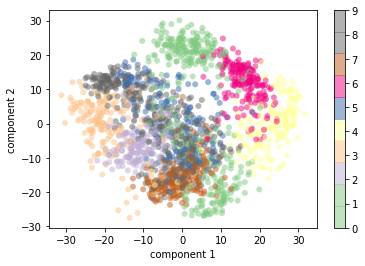

In [14]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

pca = PCA(6)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)

plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Accent', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()